In [72]:
import pandas as pd

# Load the CSV file into a Pandas DataFrame
file_path = 'C:/Users/Parth Badani/Downloads/2025-01-13 4_05pm.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

   CUSTOMER_ID SEGMENT                    INDUSTRY    COUNTRY    PLAN   MRR  \
0            1     SMB  Financial Services/Fintech     France  Growth   210   
1            2     SMB       Professional Services      Japan  Growth   615   
2            3     SMB                   Education  Singapore     Pro  6468   
3            4     SMB  Financial Services/Fintech     Canada  Growth   780   
4            5     SMB                  Healthcare  Australia  Growth   900   

   SUBSCRIPTION_DURATION CUSTOMER_STATUS  CHURN_LABEL  AVG_MONTHLY_LOGINS  \
0                    436          Active            0          207.071429   
1                   1078          Active            0          201.235294   
2                    281         Churned            1          656.333333   
3                    661          Active            0          157.000000   
4                    845          Active            0          184.000000   

   AVG_TICKETS_RAISED  AVG_FEATURE_USAGE  
0          101.3571

In [73]:
# Check for missing values
print(data.isnull().sum())

CUSTOMER_ID              0
SEGMENT                  0
INDUSTRY                 0
COUNTRY                  0
PLAN                     0
MRR                      0
SUBSCRIPTION_DURATION    0
CUSTOMER_STATUS          0
CHURN_LABEL              0
AVG_MONTHLY_LOGINS       0
AVG_TICKETS_RAISED       0
AVG_FEATURE_USAGE        0
dtype: int64


In [74]:
# Get summary statistics
print(data.describe())

       CUSTOMER_ID          MRR  SUBSCRIPTION_DURATION  CHURN_LABEL  \
count  5000.000000  5000.000000            5000.000000   5000.00000   
mean   2500.500000  2475.525600             659.601200      0.15660   
std    1443.520003  2603.542523             281.627336      0.36346   
min       1.000000    75.000000              30.000000      0.00000   
25%    1250.750000   525.000000             454.000000      0.00000   
50%    2500.500000   975.000000             679.000000      0.00000   
75%    3750.250000  4356.000000             897.000000      0.00000   
max    5000.000000  9900.000000            1108.000000      1.00000   

       AVG_MONTHLY_LOGINS  AVG_TICKETS_RAISED  AVG_FEATURE_USAGE  
count         5000.000000         5000.000000        5000.000000  
mean           447.944122          223.982020          50.123106  
std            310.391901          155.520680          17.722630  
min            114.500000           63.666667           0.002423  
25%            200.000000

In [75]:
# Check data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CUSTOMER_ID            5000 non-null   int64  
 1   SEGMENT                5000 non-null   object 
 2   INDUSTRY               5000 non-null   object 
 3   COUNTRY                5000 non-null   object 
 4   PLAN                   5000 non-null   object 
 5   MRR                    5000 non-null   int64  
 6   SUBSCRIPTION_DURATION  5000 non-null   int64  
 7   CUSTOMER_STATUS        5000 non-null   object 
 8   CHURN_LABEL            5000 non-null   int64  
 9   AVG_MONTHLY_LOGINS     5000 non-null   float64
 10  AVG_TICKETS_RAISED     5000 non-null   float64
 11  AVG_FEATURE_USAGE      5000 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 468.9+ KB
None


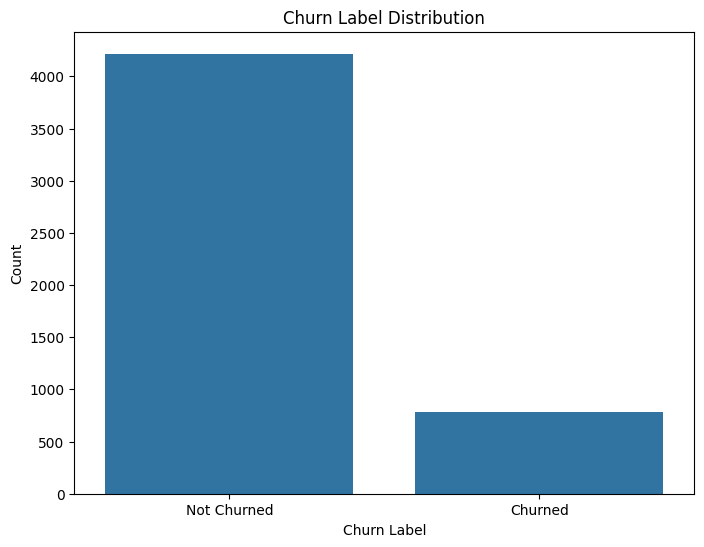


Value counts for CHURN_LABEL:
CHURN_LABEL
0    4217
1     783
Name: count, dtype: int64


In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize churn distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='CHURN_LABEL', data=data)
plt.title('Churn Label Distribution')
plt.xlabel('Churn Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Churned', 'Churned'])  # Assuming 0 = Not Churned, 1 = Churned
plt.show()

# Display the actual counts for churn labels
print("\nValue counts for CHURN_LABEL:")
print(data['CHURN_LABEL'].value_counts())

In [77]:
# Encode categorical variables
data = pd.get_dummies(data, columns=['SEGMENT', 'PLAN', 'COUNTRY', 'INDUSTRY'], drop_first=True)

In [86]:
# Normalize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['AVG_MONTHLY_LOGINS', 'MRR', 'AVG_TICKETS_RAISED', 'AVG_FEATURE_USAGE']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [79]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X = data.drop('CHURN_LABEL', axis=1)  # Features
y = data['CHURN_LABEL']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [81]:
# Encode remaining categorical columns
'''
categorical_columns = ['INDUSTRY']  # Only include columns that haven't been encoded yet
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

'''

"\ncategorical_columns = ['INDUSTRY']  # Only include columns that haven't been encoded yet\ndata_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)\n\n"

In [82]:
# Prepare features (X) and target (y)
# Remove CUSTOMER_ID, CHURN_LABEL, and CUSTOMER_STATUS_Churned from features

X = data.drop(['CUSTOMER_ID', 'CHURN_LABEL', 'CUSTOMER_STATUS', 'SUBSCRIPTION_DURATION'], axis=1)
y = data['CHURN_LABEL']

In [83]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# Create a copy of X_train and X_test as pandas DataFrames
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Scale only numerical columns
X_train_df[numerical_features] = scaler.fit_transform(X_train_df[numerical_features])
X_test_df[numerical_features] = scaler.transform(X_test_df[numerical_features])

In [88]:
# Train and evaluate the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(random_state=42)
model.fit(X_train_df, y_train)

# Make predictions
y_pred = model.predict(X_test_df)

In [89]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [90]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [91]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [93]:
# Train the model on the oversampled data
model = LogisticRegression(random_state=42)
model.fit(X_train_smote, y_train_smote)

LogisticRegression(random_state=42)

In [94]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [95]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.579

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.61      0.71       845
           1       0.16      0.39      0.22       155

    accuracy                           0.58      1000
   macro avg       0.50      0.50      0.47      1000
weighted avg       0.74      0.58      0.64      1000


Confusion Matrix:
 [[518 327]
 [ 94  61]]


In [96]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


Top 10 Most Important Features:
                           Feature  Importance
8                   COUNTRY_Brazil    2.241886
16                     COUNTRY_USA    2.146210
11                 COUNTRY_Germany    2.004688
24                 INDUSTRY_Retail    1.969739
19              INDUSTRY_Logistics    1.940040
12                   COUNTRY_India    1.879205
23            INDUSTRY_Real Estate    1.876248
25             INDUSTRY_Technology    1.871661
15                      COUNTRY_UK    1.831878
22  INDUSTRY_Professional Services    1.826923


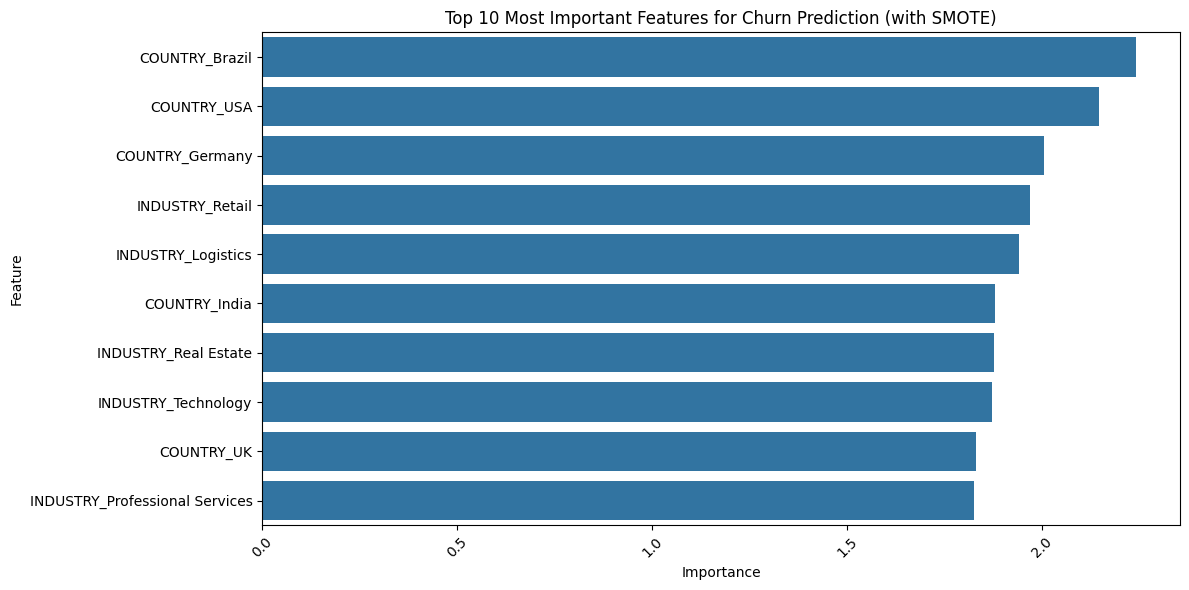

In [97]:
# Visualize feature importance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features for Churn Prediction (with SMOTE)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [98]:
pip install xgboost

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [100]:
# Define features (X) and target (y)
X = data.drop(columns=['CUSTOMER_ID', 'CHURN_LABEL', 'CUSTOMER_STATUS', 'SUBSCRIPTION_DURATION'])
y = data['CHURN_LABEL']

In [101]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [102]:
# Identify categorical columns and encode them
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [103]:
# Align columns in X_train and X_test
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [104]:
# Apply SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [105]:
# Random Forest Classifier
print("Training Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

Training Random Forest Classifier...


RandomForestClassifier(class_weight='balanced', random_state=42)

In [106]:
# Predictions and Evaluation for Random Forest
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

In [107]:
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("ROC AUC Score:", roc_auc_score(y_test, rf_probabilities))
print("Classification Report:\n", classification_report(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))


Random Forest Results:
Accuracy: 0.751
ROC AUC Score: 0.5950578386260776
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       843
           1       0.22      0.23      0.22       157

    accuracy                           0.75      1000
   macro avg       0.54      0.54      0.54      1000
weighted avg       0.76      0.75      0.75      1000

Confusion Matrix:
 [[715 128]
 [121  36]]


In [108]:
# XGBoost Classifier
print("\nTraining XGBoost Classifier...")
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)


Training XGBoost Classifier...


C:\Users\Parth Badani\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:01:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [109]:
# Predictions and Evaluation for XGBoost
xgb_predictions = xgb_model.predict(X_test)
xgb_probabilities = xgb_model.predict_proba(X_test)[:, 1]

In [110]:
print("\nXGBoost Results:")
print("Accuracy:", accuracy_score(y_test, xgb_predictions))
print("ROC AUC Score:", roc_auc_score(y_test, xgb_probabilities))
print("Classification Report:\n", classification_report(y_test, xgb_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_predictions))


XGBoost Results:
Accuracy: 0.725
ROC AUC Score: 0.5677101041926393
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83       843
           1       0.21      0.27      0.24       157

    accuracy                           0.72      1000
   macro avg       0.53      0.54      0.54      1000
weighted avg       0.76      0.72      0.74      1000

Confusion Matrix:
 [[682 161]
 [114  43]]


In [111]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CUSTOMER_ID                          5000 non-null   int64  
 1   MRR                                  5000 non-null   float64
 2   SUBSCRIPTION_DURATION                5000 non-null   float64
 3   CUSTOMER_STATUS                      5000 non-null   object 
 4   CHURN_LABEL                          5000 non-null   int64  
 5   AVG_MONTHLY_LOGINS                   5000 non-null   float64
 6   AVG_TICKETS_RAISED                   5000 non-null   float64
 7   AVG_FEATURE_USAGE                    5000 non-null   float64
 8   SEGMENT_Mid-Market                   5000 non-null   bool   
 9   SEGMENT_SMB                          5000 non-null   bool   
 10  PLAN_Growth                          5000 non-null   bool   
 11  PLAN_Pro                      

In [112]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

In [113]:
correlation = numeric_data.corr()['CHURN_LABEL'].sort_values(ascending=False)
print(correlation)

CHURN_LABEL              1.000000
MRR                      0.001001
AVG_FEATURE_USAGE       -0.006919
AVG_MONTHLY_LOGINS      -0.016927
AVG_TICKETS_RAISED      -0.016944
CUSTOMER_ID             -0.023075
SUBSCRIPTION_DURATION   -0.706363
Name: CHURN_LABEL, dtype: float64



Top 10 Most Important Features:
                                Feature  Importance
3                     AVG_FEATURE_USAGE    0.198561
0                                   MRR    0.169335
2                    AVG_TICKETS_RAISED    0.165863
1                    AVG_MONTHLY_LOGINS    0.162759
5                           SEGMENT_SMB    0.022426
4                    SEGMENT_Mid-Market    0.018850
15                           COUNTRY_UK    0.017278
16                          COUNTRY_USA    0.016968
17  INDUSTRY_Financial Services/Fintech    0.015337
24                      INDUSTRY_Retail    0.015331


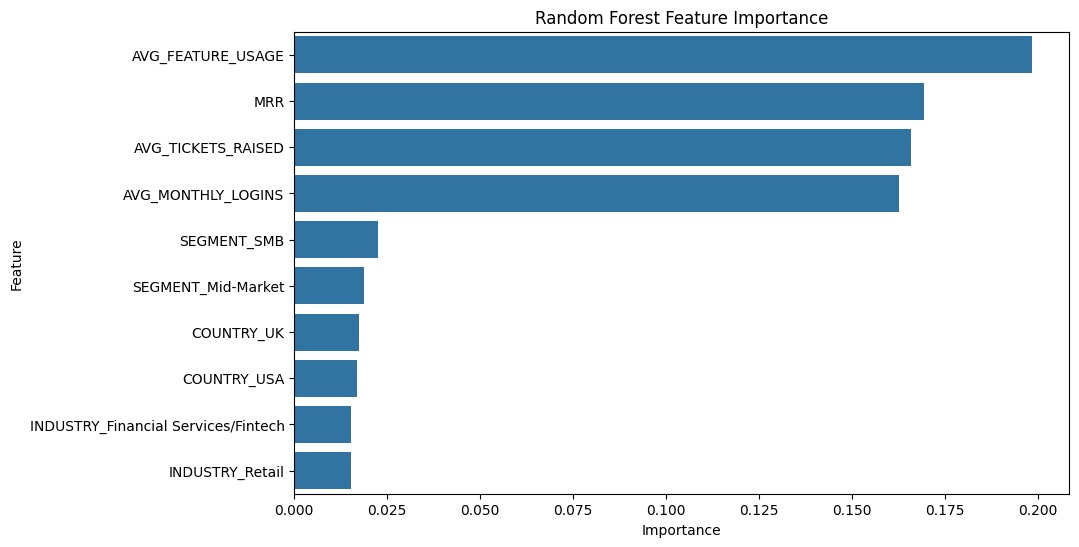

In [118]:
# Feature Importance (Optional)
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest Feature Importance
rf_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(rf_feature_importance.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance.head(10))
plt.title('Random Forest Feature Importance')
plt.show()


Top 10 Most Important Features:
                                Feature  Importance
8                        COUNTRY_Brazil    0.059732
11                      COUNTRY_Germany    0.048019
25                  INDUSTRY_Technology    0.047646
22       INDUSTRY_Professional Services    0.047379
17  INDUSTRY_Financial Services/Fintech    0.045012
4                    SEGMENT_Mid-Market    0.044802
9                        COUNTRY_Canada    0.044324
16                          COUNTRY_USA    0.043819
12                        COUNTRY_India    0.042802
10                       COUNTRY_France    0.042165


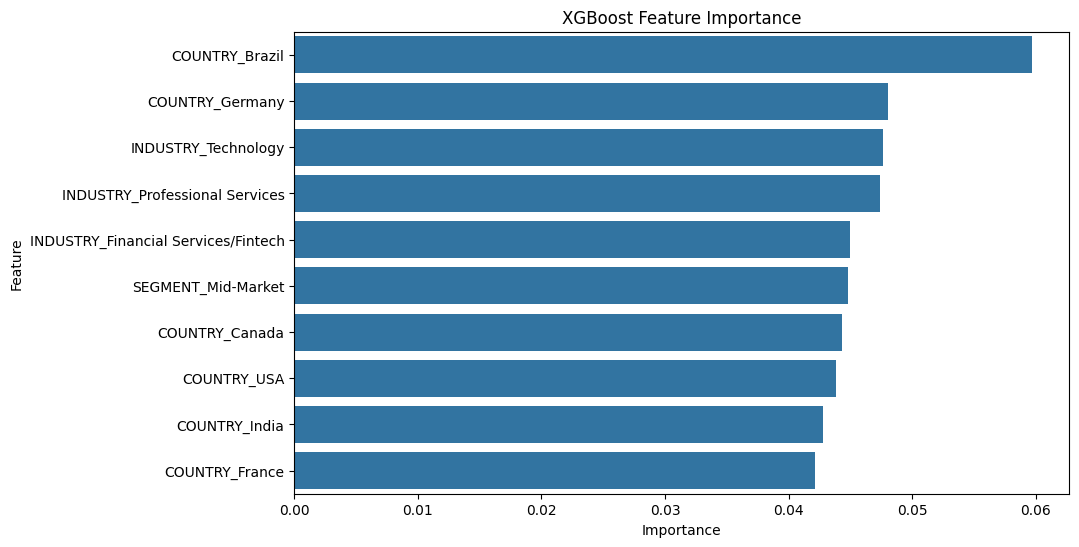

In [119]:
# XGBoost Feature Importance
xgb_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(xgb_feature_importance.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_feature_importance.head(10))
plt.title('XGBoost Feature Importance')
plt.show()

In [132]:
# Ensure the test set indices are preserved
X_test = X_test.copy()
y_test = y_test.copy()

# Add predictions and probabilities to the test set
data.loc[X_test.index, 'PREDICTED_CHURN'] = rf_predictions
data.loc[X_test.index, 'CHURN_PROBABILITY'] = rf_probabilities

In [133]:
# First, let's load the original data again
file_path = 'C:/Users/Parth Badani/Downloads/2025-01-13 4_05pm.csv'
original_data = pd.read_csv(file_path)

In [126]:
# Save the final dataset to a CSV file
output_file = 'churn_prediction.csv'
data.to_csv(output_file, index=False)

print(f"Final dataset with predictions saved to {output_file}")

Final dataset with predictions saved to churn_prediction.csv


In [135]:
# Ensure test set indices are preserved
X_test = X_test.copy()
y_test = y_test.copy()

In [136]:
# Create a DataFrame for predictions
predictions_df = pd.DataFrame({
    'PREDICTED_CHURN': rf_predictions,
    'CHURN_PROBABILITY': rf_probabilities
}, index=X_test.index)

In [137]:
# Merge predictions with the original dataset
final_dataset = original_data.copy()
final_dataset = final_dataset.merge(predictions_df, left_index=True, right_index=True, how='left')

# Fill missing values for rows not in the test set
final_dataset['PREDICTED_CHURN'] = final_dataset['PREDICTED_CHURN'].fillna(0).astype(int)
final_dataset['CHURN_PROBABILITY'] = final_dataset['CHURN_PROBABILITY'].fillna(0.0)

In [138]:
# Save the final dataset
output_file = "final_churn_prediction.csv"
final_dataset.to_csv(output_file, index=False)

print(f"Final dataset saved to {output_file}")

Final dataset saved to final_churn_prediction.csv
